In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#CSV imports
oews_industry=pd.read_csv('resources/input_folder/data_scientist_industry_2020_OES_Report.csv')
projections_industry=pd.read_csv('resources/input_folder/Employment_Projections_Data_Scientist_per_Industry.csv')
oews_state=pd.read_csv('resources/input_folder/data_scientist_states_2020_OES_Report.csv')
consumer_price_index=pd.read_csv('resources/input_folder/Cost_of_Living_Data.csv')
education=pd.read_csv('resources/input_folder/bachelors_per_stae_per_field.csv')

In [3]:
## Data Cleaning ##

In [4]:
#Clean oews_industry
oews_industry=oews_industry.dropna()
header_oews_industry=oews_industry.iloc[0,:]
oews_industry_df=oews_industry.drop([4])
oews_industry_df.columns=header_oews_industry
oews_industry_df=oews_industry_df.rename_axis(None, axis=1)
oews_industry_df=oews_industry_df.reset_index()
oews_industry_df=oews_industry_df.drop(columns=['index'])

#Reorganize columns
oews_industry_df=oews_industry_df.rename(columns={'Occupation (SOC code)':'Occupation (SOC Code)',
                                               'Employment(1)':'Employment',
                                               'Annual median wage(2)':'Annual Median Wage',
                                               'Annual 10th percentile wage(2)':'Annual 10th Percentile Wage',
                                               'Annual 25th percentile wage(2)':'Annual 25th Percentile Wage',
                                               'Annual 75th percentile wage(2)':'Annual 75th Percentile Wage',
                                               'Annual 90th percentile wage(2)':'Annual 90th Percentile Wage'})

oews_industry_clean_df=oews_industry_df[['Occupation (SOC Code)','Employment','Annual Median Wage','Annual 10th Percentile Wage',
                             'Annual 25th Percentile Wage','Annual 75th Percentile Wage','Annual 90th Percentile Wage']]

oews_industry_clean_df

,Occupation (SOC Code),Employment,Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage
0,"Cross-industry, Private, Federal, State, and L...",59680,98230,52950,71790,130370,165230
1,"Cross-industry, Private Ownership Only(000001)",54970,101340,55110,74480,132960,167190
2,Sector 21 - Mining(21--22),190,99110,59140,75140,122940,144480
3,Oil and Gas Extraction(211000),190,99120,58980,74980,122780,144860
4,Oil and Gas Extraction(211100),190,99120,58980,74980,122780,144860
...,...,...,...,...,...,...,...
154,Federal Executive Branch (OEWS Designation)(99...,690,40570,31210,31680,51070,140450
155,"Federal government, including USPS(999101)",690,40570,31210,31680,51070,140450
156,"State Government, including schools and hospit...",3270,72710,45130,57730,86430,103960
157,"Local Government, excluding schools and hospit...",480,73890,42460,53800,93570,110700


In [5]:
#Data scientists per industry sector
sector = oews_industry_clean_df[ 
    oews_industry_clean_df['Occupation (SOC Code)'].str.contains('Sector')]
sector_df = sector.append(oews_industry_clean_df.iloc[0,:], ignore_index=True)

sector_df.head()

,Occupation (SOC Code),Employment,Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage
0,Sector 21 - Mining(21--22),190,99110,59140,75140,122940,144480
1,Sector 23 - Construction(23--24),50,86690,58890,69660,103780,126220
2,"Sectors 31, 32, and 33 - Manufacturing(31--34)",-,110460,59910,79980,142810,175360
3,Sector 42 - Wholesale Trade(42--43),1670,102240,56590,74950,133670,166410
4,Sectors 44 and 45 - Retail Trade(44--46),-,115730,60070,88240,144790,179010


In [6]:
#Clean employment projections per industry
# Adjust for employment in thousands
projections_industry=projections_industry.dropna()
projections_industry['2019 Employment']=(projections_industry['2019 Employment']*1000)
projections_industry['Projected 2029 Employment']=projections_industry['Projected 2029 Employment']*1000
projections_industry['Employment Change, 2019-2029']=projections_industry['Employment Change, 2019-2029']*1000
projections_industry_df=projections_industry.reset_index()
projections_industry_adjusted_df=projections_industry_df.drop(columns=['index'])

In [7]:
#Clean employment projections per industry
# Reorganize columns
projections_industry_clean_df=projections_industry_adjusted_df[['Display Level','Industry Title','Industry Code',
                                  '2019 Employment','Projected 2029 Employment',
                                  'Employment Change, 2019-2029','Employment Percent Change, 2019-2029',
                                  '2019 Percent of Occupation', '2019 Percent of Industry',
                                  'Projected 2029 Percent of Occupation','Projected 2029 Percent of Industry']]

projections_industry_clean_df

,Display Level,Industry Title,Industry Code,2019 Employment,Projected 2029 Employment,"Employment Change, 2019-2029","Employment Percent Change, 2019-2029",2019 Percent of Occupation,2019 Percent of Industry,Projected 2029 Percent of Occupation,Projected 2029 Percent of Industry
0,1,Self-employed workers,"=""TE1100""",1000.0,1100.0,100.0,8.0,3.0,0.0,2.4,0.0
1,1,Total wage and salary employment,"=""TE1200""",32200.0,42400.0,10200.0,31.6,97.0,0.0,97.6,0.0
2,2,"Mining, quarrying, and oil and gas extraction","=""210000""",100.0,100.0,0.0,4.3,0.4,0.0,0.3,0.0
3,3,Oil and gas extraction,"=""211000""",100.0,100.0,0.0,4.3,0.4,0.1,0.3,0.1
4,2,Utilities,"=""220000""",100.0,100.0,0.0,7.1,0.2,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
97,5,"Business, professional, labor, political, and ...","=""813900""",100.0,100.0,0.0,27.8,0.2,0.0,0.2,0.0
98,2,Government,"=""900000""",2100.0,2500.0,400.0,19.5,6.4,0.0,5.8,0.0
99,3,Federal government,"=""910000""",300.0,400.0,0.0,14.3,1.0,0.0,0.9,0.0
100,4,"Federal government, excluding postal service","=""999100""",300.0,400.0,0.0,14.3,1.0,0.0,0.9,0.0


In [8]:
#Clean oews_state
oews_state=oews_state.dropna()
# States dropped: Delaware, North Dakota, Vermont, Wyoming.
# Incomplete data: New Mexico.
header_oews_state=oews_state.iloc[0,:]
oews_state_df=oews_state.drop([4])
oews_state_df.columns=header_oews_state
oews_state_df=oews_state_df.rename_axis(None, axis=1)
oews_state_df=oews_state_df.reset_index()
oews_state_df=oews_state_df.drop(columns=['index'])
sep_state=oews_state_df['Area Name'].str.split('(', n=-1, expand=True)
oews_state_df['Area Name']=sep_state[0]

#Reorganize columns
oews_state_df.columns
oews_state_df=oews_state_df.rename(columns={'Area Name':'State','Employment(1)':'Employment',
                                      'Annual 10th percentile wage(2)':'Annual 10th Percentile Wage',
                                      'Annual 25th percentile wage(2)':'Annual 25th Percentile Wage',
                                      'Annual median wage(2)':'Annual Median Wage',
                                      'Annual 75th percentile wage(2)':'Annual 75th Percentile Wage',
                                      'Annual 90th percentile wage(2)':'Annual 90th Percentile Wage',
                                      'Employment per 1,000 jobs':'Employment per 1,000 Jobs'})

oews_state_clean_df=oews_state_df[['State','Employment','Employment per 1,000 Jobs','Annual Median Wage','Annual 10th Percentile Wage',
                      'Annual 25th Percentile Wage','Annual 75th Percentile Wage','Annual 90th Percentile Wage']]

oews_state_clean_df.head()

,State,Employment,"Employment per 1,000 Jobs",Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage
0,Alabama,210,0.113,90590,56510,74460,105650,121870
1,Alaska,170,0.561,74110,53720,61780,90980,103100
2,Arizona,1400,0.494,111900,61290,87430,130240,153540
3,Arkansas,260,0.217,109020,80310,94250,134290,160980
4,California,9510,0.579,127310,69340,87940,162630,197890


In [9]:
#Clean consumer price index
# Compare to average US national CPI of 100
consumer_price_index_df=consumer_price_index.rename(columns={
    'costIndex':'Total Cost Index',
    'groceryCost':'Grocery Cost',
    'housingCost':'Housing Cost',
    'utilitiesCost':'Utilities Cost',
    'transportationCost':'Transportation Cost',
    'miscCost':'Miscellaneous Cost'})
consumer_price_index_df

,State,Total Cost Index,Grocery Cost,Housing Cost,Utilities Cost,Transportation Cost,Miscellaneous Cost
0,Mississippi,86.1,91.6,70.1,89.1,89.2,91.4
1,Arkansas,86.9,92.0,73.9,91.8,83.6,85.6
2,Oklahoma,87.0,95.4,71.9,94.1,89.5,93.2
3,Missouri,87.1,96.6,70.6,99.6,87.3,95.7
4,New Mexico,87.5,100.9,77.7,87.9,91.6,100.1
5,Tennessee,88.7,93.3,80.2,93.4,89.7,88.5
6,Michigan,88.9,89.3,75.2,97.3,97.4,93.0
7,Kansas,89.0,91.9,73.8,103.0,92.3,98.9
8,Georgia,89.2,96.9,73.8,92.4,97.6,98.5
9,Wyoming,89.3,98.7,72.3,87.3,99.3,94.9


In [10]:
#Merge OEWS per state and consumer price index
oews_state_clean_df
consumer_price_index_df
oews_state_cpi_df=pd.merge(oews_state_clean_df,consumer_price_index_df, on='State', how='outer')

oews_state_cpi_df

#Clean oews_state_cpi_df
# States dropped: Delaware, North Dakota, Vermont, Wyoming, District of Columbia.
oews_state_cpi_clean_df=oews_state_cpi_df.dropna()

oews_state_cpi_clean_df.head()

,State,Employment,"Employment per 1,000 Jobs",Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage,Total Cost Index,Grocery Cost,Housing Cost,Utilities Cost,Transportation Cost,Miscellaneous Cost
0,Alabama,210,0.113,90590,56510,74460,105650,121870,89.3,97.4,71.5,103.3,88.6,90.8
1,Alaska,170,0.561,74110,53720,61780,90980,103100,129.9,134.2,133.9,154.2,130.8,150.9
2,Arizona,1400,0.494,111900,61290,87430,130240,153540,97.0,96.9,91.7,107.4,109.6,94.7
3,Arkansas,260,0.217,109020,80310,94250,134290,160980,86.9,92.0,73.9,91.8,83.6,85.6
4,California,9510,0.579,127310,69340,87940,162630,197890,151.7,121.4,227.3,117.7,138.9,114.5


In [11]:
#CSV exports
oews_industry_clean_df.to_csv('resources/output_folder/OEWS_per_industry.csv')
projections_industry_clean_df.to_csv('resources/output_folder/employment_projections_industry.csv')
oews_state_clean_df.to_csv('resources/output_folder/OEWS_per_state.csv')
consumer_price_index_df.to_csv('resources/output_folder/consumer_price_index.csv')
oews_state_cpi_df.to_csv('resources/output_folder/oews_state_cpi_withNaN.csv')
oews_state_cpi_clean_df.to_csv('resources/output_folder/oews_state_cpi_clean.csv')

In [12]:
## Rna Analysis ##

In [13]:
def convert_to_num(x):
    if x.strip() == '-':
        return np.nan
    else:
        return float(x)
# data is still a string rather than a number
# all columns except for 'Industry Title'
numeric_columns = [ c for c in oews_industry_clean_df.columns if c!='Occupation (SOC Code)']
for c in numeric_columns:
    oews_industry_clean_df[c] = oews_industry_clean_df[c].apply(convert_to_num)

<ipython-input-13-7eaa94b36961>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oews_industry_clean_df[c] = oews_industry_clean_df[c].apply(convert_to_num)


In [14]:
# Find 'Industry Title' with 'computer' in it
is_comp = projections_industry_clean_df['Industry Title'].str.lower().str.contains('computer')
projections_industry_clean_df['Industry Title'][is_comp].to_list()

['Computer and electronic product manufacturing',
 'Computer systems design and related services']

In [15]:
# Note: capitalization is different in this dataframe compared to the above
computer_only_projection = projections_industry_clean_df[ 
    projections_industry_clean_df['Industry Title'] == 'Computer systems design and related services' ].T
computer_only_projection

,58
Display Level,4
Industry Title,Computer systems design and related services
Industry Code,"=""541500"""
2019 Employment,4500
Projected 2029 Employment,6700
"Employment Change, 2019-2029",2200
"Employment Percent Change, 2019-2029",48.7
2019 Percent of Occupation,13.5
2019 Percent of Industry,0.2
Projected 2029 Percent of Occupation,15.4


Text(0.5, 1.0, 'Employment and Projection for\nComputer systems design and related services')

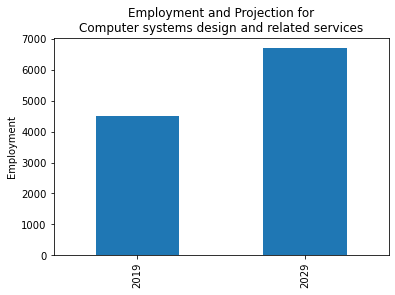

In [16]:
temp = computer_only_projection.loc[ ['2019 Employment', 'Projected 2029 Employment'] ]
temp.index = ['2019', '2029']
ax = temp.plot.bar()
ax.set_ylabel('Employment')
ax.get_legend().remove()
ax.set_title('Employment and Projection for\nComputer systems design and related services')

In [17]:
# Find 'Industry Title' with 'math' in it
is_comp = projections_industry_clean_df['Industry Title'].str.lower().str.contains('math')
projections_industry_clean_df['Industry Title'][is_comp].to_list()

[]

In [18]:
#Cleaning education per state datafile
education=education[[
    'GEO_ID',
    'NAME',
    'B15010_001E',
    'B15010_002E',
    'B15010_003E',
    'B15010_004E',
    'B15010_012E',
    'B15010_013E',
    'B15010_014E',
    'B15010_015E',
    'B15010_016E']]

education=education.dropna()
header=education.iloc[0,:]
education.drop(labels=0,axis=0,inplace=True)
education=education.reset_index()
del education['index']
education.drop(labels=51,axis=0,inplace=True)
education.columns=header

In [19]:
#Reorganize education columns
education_clean_df=education.rename(columns={
    'id':'Geo ID',
    'Geographic Area Name':'State',
    'Estimate!!Total:':'Total w/ Degree',
    'Estimate!!Total:!!Science and Engineering!!Computers, Mathematics and Statistics':'Computers, Mathematics and Statistics',
    'Estimate!!Total:!!Science and Engineering!!Biological, Agricultural, and Environmental Sciences':'Biological, Agricultural, and Environmental Sciences',
    'Estimate!!Total:!!Science and Engineering!!Physical and Related Sciences':'Physical and Related Sciences',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Literature and Languages':'Literature and Languages',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Liberal Arts and History':'Liberal Arts and History',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Visual and Performing Arts':'Visual and Performing Arts',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Communications':'Communications',
    'Estimate!!Total:!!Arts, Humanities, and Other!!Other':'All Other'})

In [20]:
# data is still a string rather than a number
# all columns except for 'Geo ID' and 'State'
numeric_columns = [ c for c in education_clean_df.columns if c not in ['Geo ID', 'State']]
for c in numeric_columns:
    education_clean_df[c] = education_clean_df[c].apply(convert_to_num)
numeric_columns.remove('Total w/ Degree')

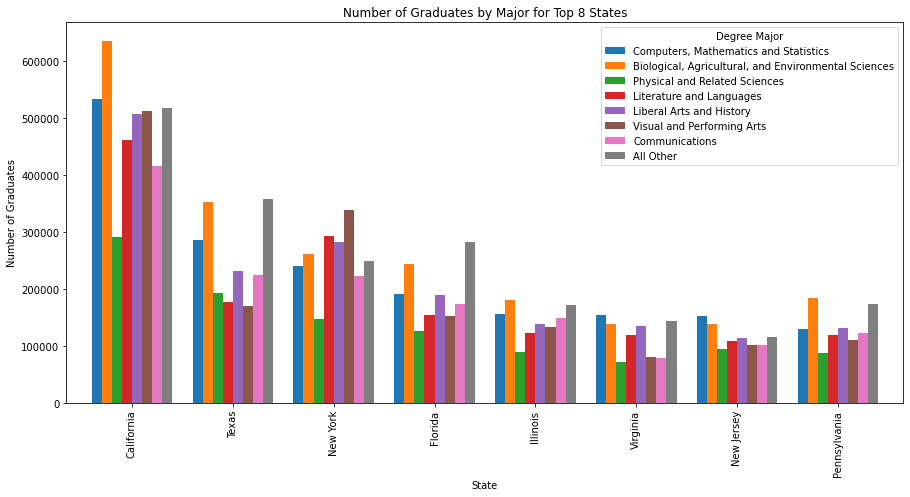

In [21]:
ax = education_clean_df.nlargest(8, columns=['Computers, Mathematics and Statistics']).plot.bar(
    x='State', y=numeric_columns, figsize=(15,7), width=0.8)   
# 'Computers, Mathematics and Statistics'
ax.set_ylabel('Number of Graduates')
ax.set_title('Number of Graduates by Major for Top 8 States')
ax.legend(title='Degree Major');

In [22]:
url = 'https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv'
state_region_df = pd.read_csv(url)
state_region_df.head(3)

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central


In [23]:
# create a dictionary with states as keys, and the state's region as values
# for exmaple,  state2region['California'] = 'West'
state2region = dict(zip(state_region_df['State'], state_region_df['Region']))

In [24]:
# gp = state_region_df.groupby('Region')['State']
# for region, data in gp:
#     print(f'Region: {region}\n' + '='*60)
#     print(data.to_list())
#     print()

In [25]:
### IMPORTANT ### ONLY RUN ONCE
### IF RUN AGAIN, RUN ENTIRE NOTEBOOK AGAIN
# create a new column which maps the state to the region of that state
# for example, the 'State' of 'California' will have a new 'Region' of 'West'
# because it is in the western part of the united states
education_clean_df['Region'] = education_clean_df['State'].map(state2region)
# Get the column names of the dataframe
columns = education_clean_df.columns.to_list()
# Put 'Region', which is last, into the second index position of column names
columns.insert(2, columns.pop())
columns = columns[1:]  # skip the forst column name, 'Geo ID'
# reorder the columns in the dataframe
education_clean_df = education_clean_df.reindex(columns=columns)
education_clean_df.head()

,State,Region,Total w/ Degree,"Computers, Mathematics and Statistics","Biological, Agricultural, and Environmental Sciences",Physical and Related Sciences,Literature and Languages,Liberal Arts and History,Visual and Performing Arts,Communications,All Other
0,Alabama,South,885357.0,35624.0,51733.0,25051.0,19816.0,38296.0,23607.0,28095.0,62325.0
1,Alaska,West,146157.0,5132.0,14014.0,8095.0,6401.0,8636.0,4790.0,3311.0,11628.0
2,Arizona,West,1492158.0,68464.0,92835.0,44408.0,51202.0,61374.0,55900.0,56241.0,93000.0
3,Arkansas,South,475367.0,19902.0,35631.0,12201.0,14045.0,22599.0,14528.0,14656.0,29757.0
4,California,West,9428484.0,533563.0,636542.0,291237.0,461068.0,507152.0,513369.0,416285.0,518193.0


In [26]:
# columns that are counts of degrees (excluding Total w/ Degree)
columns = ['Computers, Mathematics and Statistics',
         'Biological, Agricultural, and Environmental Sciences',
         'Physical and Related Sciences',
         'Literature and Languages',
         'Liberal Arts and History',
         'Visual and Performing Arts',
         'Communications', 
         'All Other']

In [27]:
# convert into percentages of total degrees per state
total_degrees = education_clean_df[columns].sum(axis=1)
for c in columns:
    education_clean_df[c] = education_clean_df[c] / total_degrees

In [28]:
education_clean_df.head()

,State,Region,Total w/ Degree,"Computers, Mathematics and Statistics","Biological, Agricultural, and Environmental Sciences",Physical and Related Sciences,Literature and Languages,Liberal Arts and History,Visual and Performing Arts,Communications,All Other
0,Alabama,South,885357.0,0.125195,0.181808,0.088038,0.069641,0.134586,0.082963,0.098736,0.219032
1,Alaska,West,146157.0,0.082765,0.226007,0.130550,0.103230,0.139275,0.077249,0.053397,0.187527
2,Arizona,West,1492158.0,0.130800,0.177361,0.084841,0.097821,0.117255,0.106797,0.107448,0.177676
3,Arkansas,South,475367.0,0.121860,0.218168,0.074707,0.085997,0.138373,0.088955,0.089738,0.182202
4,California,West,9428484.0,0.137608,0.164167,0.075111,0.118911,0.130797,0.132400,0.107362,0.133644


Text(0, 0.5, 'Percent of All Degrees Awarded per State')

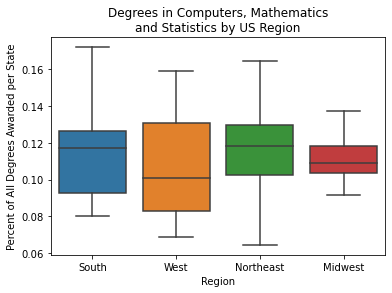

In [29]:
import seaborn as sns
ax = sns.boxplot(
    x='Region', 
    y='Computers, Mathematics and Statistics', 
    data=education_clean_df)
ax.set_title('Degrees in Computers, Mathematics\nand Statistics by US Region')
ax.set_ylabel('Percent of All Degrees Awarded per State')

In [30]:
#CSV export
education_clean_df.to_csv('resources/output_folder/degree_per_state.csv')

In [31]:
## Dave's Analysis ##

In [32]:
oews_state_clean_df

# Drop New Mexico
oews_state_woNM=oews_state_clean_df.drop([30])
oews_state_woNM_df=oews_state_woNM.reset_index(drop=True)

oews_state_woNM_df

# Drop California
oews_state_woCA=oews_state_woNM.drop([4])
oews_state_woCA_df=oews_state_woCA.reset_index(drop=True)

oews_state_woCA_df.head()

,State,Employment,"Employment per 1,000 Jobs",Annual Median Wage,Annual 10th Percentile Wage,Annual 25th Percentile Wage,Annual 75th Percentile Wage,Annual 90th Percentile Wage
0,Alabama,210,0.113,90590,56510,74460,105650,121870
1,Alaska,170,0.561,74110,53720,61780,90980,103100
2,Arizona,1400,0.494,111900,61290,87430,130240,153540
3,Arkansas,260,0.217,109020,80310,94250,134290,160980
4,Colorado,1260,0.489,92320,53780,69400,121000,151940


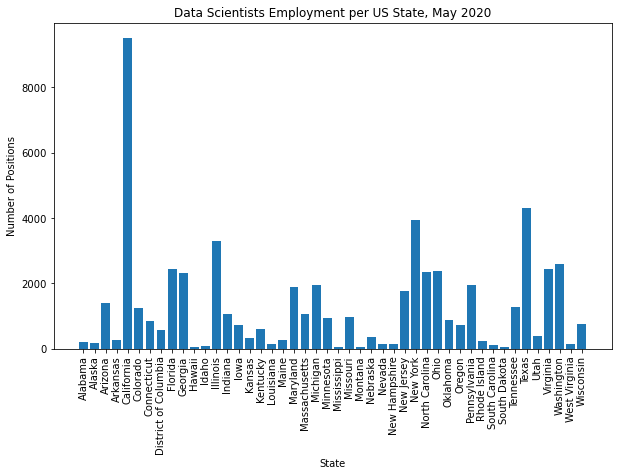

Notes: No data for US states Delaware, New Mexico, North Dakota, Vermont, and Wyoming.
Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.


In [33]:
#Employment (number of jobs) bar graph
oews_state_woNM_df

bar_labels=oews_state_woNM_df['State']
emp_list=oews_state_woNM_df['Employment'].astype('float')

plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')

plt.bar(bar_labels, emp_list)

plt.title('Data Scientists Employment per US State, May 2020')
plt.xlabel('State')
plt.ylabel('Number of Positions')

plt.savefig('resources/images/Data Scientists Employment per US State.png')
          
plt.show()

print(f'Notes: No data for US states Delaware, New Mexico, North Dakota, Vermont, and Wyoming.')
print(f'Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.')

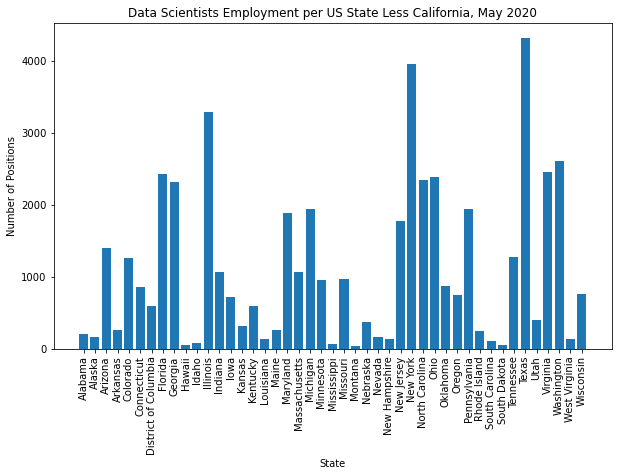

Notes: No data for US states Delaware, New Mexico, North Dakota, Vermont, and Wyoming.
Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.


In [34]:
#Employment (number of jobs) less CA bar graph
oews_state_woCA_df

#Bar graph
bar_labels=oews_state_woCA_df['State']
emp_list=oews_state_woCA_df['Employment'].astype('float')

plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')

plt.bar(bar_labels, emp_list)

plt.title('Data Scientists Employment per US State Less California, May 2020')
plt.xlabel('State')
plt.ylabel('Number of Positions')

plt.savefig('resources/images/Data Scientists Employment per US State Less California.png')
          
plt.show()

print(f'Notes: No data for US states Delaware, New Mexico, North Dakota, Vermont, and Wyoming.')
print(f'Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.')

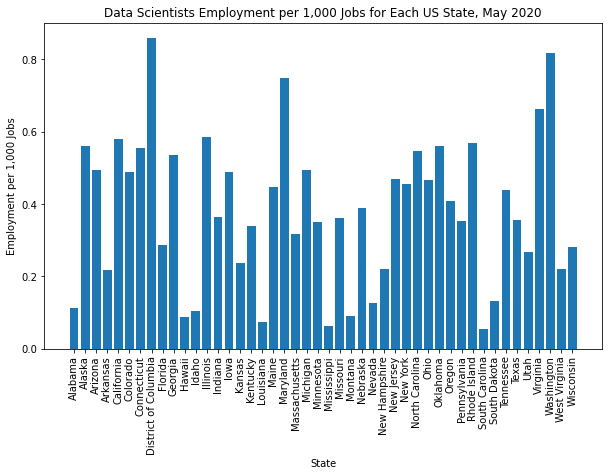

Notes: No data for US states Delaware, New Mexico, North Dakota, Vermont, and Wyoming.
Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.


In [35]:
#Employment per 1,000 jobs
oews_state_woNM_df

#Bar graph
bar_labels=oews_state_woNM_df['State']
emp_rate=oews_state_woNM_df['Employment per 1,000 Jobs'].astype('float')

plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')

plt.bar(bar_labels, emp_rate)

plt.title('Data Scientists Employment per 1,000 Jobs for Each US State, May 2020')
plt.xlabel('State')
plt.ylabel('Employment per 1,000 Jobs')

plt.savefig('resources/images/Data Scientists Employment per 1,000 Jobs for Each US State.png')
          
plt.show()

print(f'Notes: No data for US states Delaware, New Mexico, North Dakota, Vermont, and Wyoming.')
print(f'Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.')

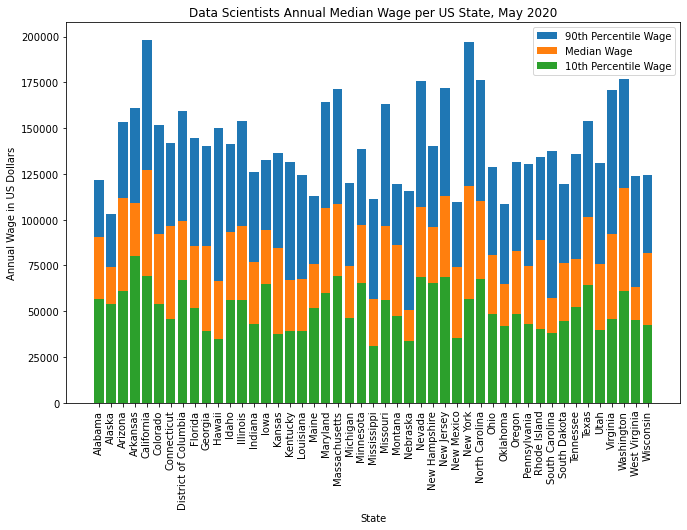

Notes: No data for US states Delaware, North Dakota, Vermont, and Wyoming.
Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.


In [36]:
#Median wage bar graph
oews_state_clean_df

bar_labels=oews_state_clean_df['State']
med_wage=oews_state_clean_df['Annual Median Wage'].astype('float')
low_wage=oews_state_clean_df['Annual 10th Percentile Wage'].astype('float')
top_wage=oews_state_clean_df['Annual 90th Percentile Wage'].astype('float')

fig, ax = plt.subplots(figsize=(11, 7))

ax.bar(bar_labels, top_wage, label='90th Percentile Wage')
ax.bar(bar_labels, med_wage, label='Median Wage')
ax.bar(bar_labels, low_wage, label='10th Percentile Wage')

plt.xticks(rotation='vertical')
ax.set_xlabel('State')
ax.set_ylabel('Annual Wage in US Dollars')
ax.set_title('Data Scientists Annual Median Wage per US State, May 2020')
ax.legend(loc='upper right')

plt.savefig('resources/images/Data Scientists Annual Median Wage per US State.png')

plt.show()

print(f'Notes: No data for US states Delaware, North Dakota, Vermont, and Wyoming.')
print(f'Source: Bureau of Labor Statistics. U.S. Department of Labor. Occupational Employment Statistics. Accessed on May 05, 2021. Retrieved from www.bls.gov/oes/.')